## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
  x = (x / 255) * 2 - 1
  if flatten:
    x = x.reshape((len(x), -1))
  return x

def preproc_y(y, num = 10):
  y = keras.utils.to_categorical(y, num)
  return y

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
x_train.shape[1:]

(3072,)

In [44]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_dim = 10, layers = [256, 128, 64, 32, 16]):
  model = keras.models.Sequential()
  for i, layer in enumerate(layers):
    if i ==0:
      model.add(keras.layers.Dense(layer, input_shape = input_shape, activation = 'relu'))
    else:
      model.add(keras.layers.Dense(layer, activation = 'relu'))
    
  model.add(keras.layers.Dense(output_dim = output_dim, activation = 'softmax'))

  return model

model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                170       
Total params: 830,618
Trainable params: 830,618
Non-trainable params: 0
_______________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [46]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.7887 - acc: 0.3718 - val_loss: 1.5852 - val_acc: 0.4351
Epoch 2/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.5009 - acc: 0.4722 - val_loss: 1.4870 - val_acc: 0.4788
Epoch 3/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.3908 - acc: 0.5105 - val_loss: 1.4310 - val_acc: 0.4962
Epoch 4/100
50000/50000 [==============================] - 7s 138us/step - loss: 1.3070 - acc: 0.5385 - val_loss: 1.4170 - val_acc: 0.5043
Epoch 5/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.2371 - acc: 0.5657 - val_loss: 1.3980 - val_acc: 0.5091
Epoch 6/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.1789 - acc: 0.5872 - val_loss: 1.3964 - val_acc: 0.5137
Epoch 7/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.1227 - acc: 0.6071 - val_loss: 1.

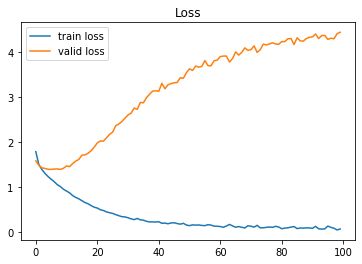

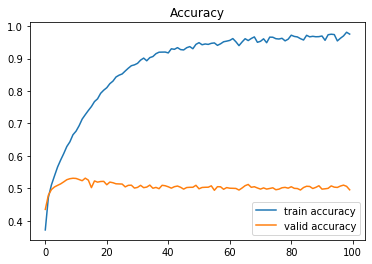

In [47]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()